In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'FoodData.csv'
resolvr_raw = pd.read_csv(file_path)

In [3]:
#resolvr_raw.head(5)

In [4]:
resolvr_raw.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Avg. daily orders',
       'City', 'Country', 'Address', 'Locality', 'Locality Verbose',
       ' Longitude ', ' Latitude ', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Percentage online orders', 'Desserts', 'Café Flag', 'Alcohol',
       'Price range', 'Q1', 'Q2', 'Q3', 'Q4', 'Aggregate', 'Votes'],
      dtype='object')

In [5]:
resolvr_raw['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [6]:
#def convert_to_dollars(args):  
def convert_to_dollars(amount,currency):
    #amount, currency = args
    rates = {'Botswana Pula(P)': 10.76, 'Brazilian Real(R$)': 4.06, 'Dollar($)': 1,'Emirati Diram(AED)': 3.67,'Indian Rupees(Rs.)':70.87,'Indonesian Rupiah(IDR)':14761.0 ,'NewZealand($)':1.51 ,'Pounds':0.77 ,'Qatari Rial(QR)':3.64 ,'Rand(R)':14.69,'Sri Lankan Rupee(LKR)':161.49 ,'Turkish Lira(TL)':6.55   }
    return amount /rates[currency] 

In [8]:
#resolvr_raw.assign(**{'Cost in Dollar': resolvr_raw['Average Cost for two','Currency'].apply(convert_to_dollars, axis=1)})
#resolvr_std = resolvr_raw.assign(**{'Cost in Dollar': resolvr_raw['Average Cost for two','Currency'].apply(convert_to_dollars, axis=1)})
test = resolvr_raw.iloc[0]
#type(test)
print (test['Average Cost for two'],test['Currency'])
convert_to_dollars(test['Average Cost for two'],test['Currency'])

1100 Botswana Pula(P)


102.23048327137546

In [9]:
#resolvr_std = resolvr_raw.assign(**{'Cost in Dollar': (resolvr_raw['Average Cost for two'],resolvr_raw['Currency']).apply(convert_to_dollars, axis=1)})
dollar_std = ['Average Cost for two','Currency']
r_std = resolvr_raw[dollar_std]
#resolvr_std = resolvr_raw.assign(**{'Cost in Dollar': r_std.apply(convert_to_dollars, axis=1)})
#r_std

In [10]:
resolvr_raw.count()

Restaurant ID               9551
Restaurant Name             9551
Country Code                9551
Avg. daily orders           9551
City                        9551
Country                     9551
Address                     9551
Locality                    9551
Locality Verbose            9551
 Longitude                  9551
 Latitude                   9551
Cuisines                    9542
Average Cost for two        9551
Currency                    9551
Has Table booking           9551
Has Online delivery         9551
Percentage online orders    2451
Desserts                     687
Café Flag                    707
Alcohol                      418
Price range                 9551
Q1                          9551
Q2                          9551
Q3                          9551
Q4                          9551
Aggregate                   9551
Votes                       9551
dtype: int64

In [5]:
resolvr_raw.count(numeric_only='TRUE')

Restaurant ID           9551
Country Code            9551
Avg. daily orders       9551
Average Cost for two    9551
Desserts                 687
Café Flag                707
Alcohol                  418
Price range             9551
Q1                      9551
Q2                      9551
Q3                      9551
Q4                      9551
Aggregate               9551
Votes                   9551
dtype: int64

In [8]:
resolvr_raw.shape

(9551, 27)

In [11]:
num_data = resolvr_raw.select_dtypes(include=[np.number])
print (num_data.columns, len(num_data.columns))

Index(['Restaurant ID', 'Country Code', 'Avg. daily orders',
       'Average Cost for two', 'Desserts', 'Café Flag', 'Alcohol',
       'Price range', 'Q1', 'Q2', 'Q3', 'Q4', 'Aggregate', 'Votes'],
      dtype='object') 14


In [12]:
num_data['Avg. daily orders'].describe()

count    9551.000000
mean       35.505811
std         7.524796
min        23.000000
25%        29.000000
50%        36.000000
75%        42.000000
max        48.000000
Name: Avg. daily orders, dtype: float64

In [13]:
#num_data.corr()

In [14]:
#num_data.describe()


In [16]:
resolvr_std = resolvr_raw
resolvr_std.insert(14,'InUSD',"")

In [17]:
resolvr_std.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Avg. daily orders',
       'City', 'Country', 'Address', 'Locality', 'Locality Verbose',
       ' Longitude ', ' Latitude ', 'Cuisines', 'Average Cost for two',
       'Currency', 'InUSD', 'Has Table booking', 'Has Online delivery',
       'Percentage online orders', 'Desserts', 'Café Flag', 'Alcohol',
       'Price range', 'Q1', 'Q2', 'Q3', 'Q4', 'Aggregate', 'Votes'],
      dtype='object')

In [18]:
resolvr_std['InUSD'] = np.vectorize(convert_to_dollars)(resolvr_std['Average Cost for two'], resolvr_std['Currency'])

In [21]:
resolvr_std['InUSD'].describe()

count    9551.000000
mean       11.536018
std        18.278506
min         0.000000
25%         4.233103
50%         7.055171
75%        11.288274
max       557.620818
Name: InUSD, dtype: float64

In [26]:
resolvr_std['Votes'].describe()

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

In [27]:
resolvr_std['Aggregate'].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate, dtype: float64

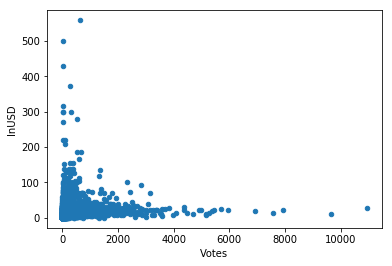

In [30]:
resolvr_std.plot(x='Votes',y='InUSD', kind='scatter')

In [28]:
resolvr_std.InUSD = resolvr_std.InUSD.round()

In [29]:
resolvr_std.to_csv('Standardised.csv', encoding='utf-8', index=False)

In [31]:
resolvr_std.corr()

,Restaurant ID,Country Code,Avg. daily orders,Average Cost for two,InUSD,Desserts,Café Flag,Alcohol,Price range,Q1,Q2,Q3,Q4,Aggregate,Votes
Restaurant ID,1.000000,0.148471,-0.006292,-0.001693,-0.018624,NaN,NaN,NaN,-0.134540,-0.321386,-0.320585,-0.321704,-0.324533,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.010387,0.043225,0.436350,NaN,NaN,NaN,0.243327,0.282515,0.287231,0.284638,0.259544,0.282189,0.154530
Avg. daily orders,-0.006292,-0.010387,1.000000,-0.027389,-0.005344,NaN,NaN,NaN,0.000013,-0.009436,-0.009675,-0.011165,-0.007583,-0.009597,-0.011117
Average Cost for two,-0.001693,0.043225,-0.027389,1.000000,0.050205,NaN,NaN,NaN,0.075083,0.052651,0.053222,0.053579,0.044940,0.051792,0.067783
InUSD,-0.018624,0.436350,-0.005344,0.050205,1.000000,NaN,NaN,NaN,0.588054,0.292414,0.293246,0.291032,0.268949,0.290212,0.185907
Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Café Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price range,-0.134540,0.243327,0.000013,0.075083,0.588054,NaN,NaN,NaN,1.000000,0.437900,0.437668,0.436833,0.416647,0.437944,0.309444
Q1,-0.321386,0.282515,-0.009436,0.052651,0.292414,NaN,NaN,NaN,0.437900,1.000000,0.981518,0.981254,0.950143,0.991051,0.316508


In [32]:
resolvr_exp = resolvr_std


In [36]:
#resolvr_exp.pop('Average Cost for two')

In [40]:
resolvr_exp.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'avg._daily_orders',
       'city', 'country', 'address', 'locality', 'locality_verbose',
       '_longitude_', '_latitude_', 'cuisines', 'currency', 'inusd',
       'has_table_booking', 'has_online_delivery', 'percentage_online_orders',
       'desserts', 'café_flag', 'alcohol', 'price_range', 'q1', 'q2', 'q3',
       'q4', 'aggregate', 'votes'],
      dtype='object')

In [39]:
resolvr_exp.columns = [c.lower().replace(' ', '_') for c in resolvr_exp.columns]

Resolvr_exp is the dataframe to be used for EDA. stored in EDA.csv

In [43]:
resolvr_exp.has_online_delivery.eq('yes').mul(1)
resolvr_exp.has_table_booking.eq('yes').mul(1)
resolvr_exp.fillna(0, inplace=True)

In [44]:
resolvr_exp.to_csv('EDA.csv', encoding='utf-8', index='False')

In [46]:
resolvr_exp.corr()

,restaurant_id,country_code,avg._daily_orders,inusd,desserts,café_flag,alcohol,price_range,q1,q2,q3,q4,aggregate,votes
restaurant_id,1.000000,0.148471,-0.006292,-0.018624,-0.015945,-0.008961,0.026172,-0.134540,-0.321386,-0.320585,-0.321704,-0.324533,-0.326212,-0.147023
country_code,0.148471,1.000000,-0.010387,0.436350,0.041131,0.005585,0.277741,0.243327,0.282515,0.287231,0.284638,0.259544,0.282189,0.154530
avg._daily_orders,-0.006292,-0.010387,1.000000,-0.005344,0.015107,-0.012363,0.003712,0.000013,-0.009436,-0.009675,-0.011165,-0.007583,-0.009597,-0.011117
inusd,-0.018624,0.436350,-0.005344,1.000000,-0.043107,0.004263,0.188732,0.588054,0.292414,0.293246,0.291032,0.268949,0.290212,0.185907
desserts,-0.015945,0.041131,0.015107,-0.043107,1.000000,0.009513,-0.012017,-0.082752,0.067447,0.063863,0.066372,0.065092,0.066547,0.007522
café_flag,-0.008961,0.005585,-0.012363,0.004263,0.009513,1.000000,-0.013571,0.072858,0.123287,0.123070,0.123080,0.115543,0.122845,0.064885
alcohol,0.026172,0.277741,0.003712,0.188732,-0.012017,-0.013571,1.000000,0.180619,0.145593,0.145713,0.145574,0.136459,0.145227,0.152079
price_range,-0.134540,0.243327,0.000013,0.588054,-0.082752,0.072858,0.180619,1.000000,0.437900,0.437668,0.436833,0.416647,0.437944,0.309444
q1,-0.321386,0.282515,-0.009436,0.292414,0.067447,0.123287,0.145593,0.437900,1.000000,0.981518,0.981254,0.950143,0.991051,0.316508
q2,-0.320585,0.287231,-0.009675,0.293246,0.063863,0.123070,0.145713,0.437668,0.981518,1.000000,0.982875,0.949600,0.991332,0.316215
